In [36]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [9]:
data = np.loadtxt('/content/Data/vardQ_.6f.csv',delimiter=',') # skip row for column names

In [10]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])
train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [21]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = LinearRegression()
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [28]:
# Create the random grid
param_grid = { 'fit_intercept': [True, False],
              }
print(y_train)
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1, 1),y_train)

[3.334454 3.156549 3.031004 2.939519 2.896526 2.856729 2.932981 2.896526
 2.747412 3.007321 2.939519 2.934498 2.850646 2.863917 2.870404 2.847573
 2.790285 2.984977 2.846337 2.789581 2.477121 2.641474 2.647383 2.708421
 2.678518 2.683947 2.693727 2.663701 2.689309 2.721811 2.663701 2.670246
 2.697229 2.691965 2.716003 2.665581 2.679428 2.661813 2.632457 2.664642
 2.687529]
RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LinearRegression(), n_iter=20000, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=20000. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LinearRegression(), n_iter=20000, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

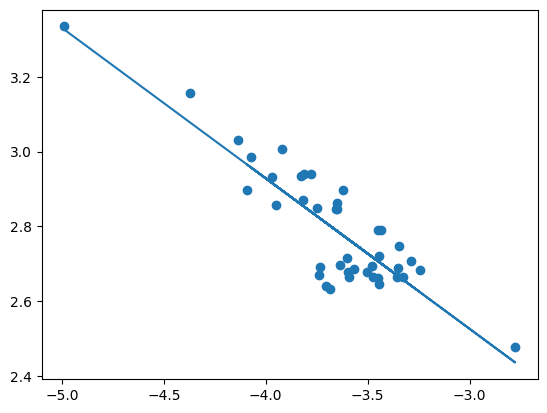

In [29]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [30]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -0.006682177854549747
Best hyperparameters:  {'fit_intercept': True}


In [39]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(x_train.reshape(-1, 1),y_train)

LinearRegression()

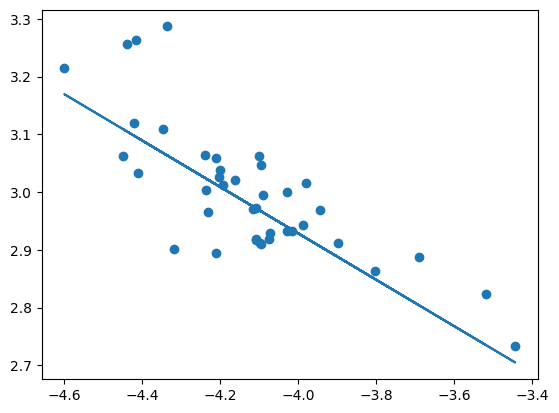

In [40]:
plt.scatter(x_stest,y_stest)
plt.plot(x_stest, model.predict(x_stest.reshape(-1,1)))

In [41]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_test.reshape(-1,1)) - 10**y_test)**2))) # 1 is the best score

RMSE:  137.59092344197327


In [42]:
print("RMSE: ", np.sqrt(np.average((10**regressor.predict(x_stest.reshape(-1,1)) - 10**y_stest)**2))) # 1 is the best score

RMSE:  212.6645561846145


## **Lasso Regression**

In [56]:
def gridSearchCV(X,y,modelName):
      if modelName == 'Ridge':
        labeler = "ridge_regression"
        model = Ridge()
      elif modelName == 'Lasso':
        labeler = "lasso_regression"
        model = Lasso()

      estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        (labeler, model)])
      # The name of paramas should be similar to that mentioned in estimators, ending with two underscores and param name.
      params = {
        'polynomial_features__degree': [1, 2, 3],
         #labeler+'__alpha': np.geomspace(4, 20, 30)
         labeler+'__alpha' : np.geomspace(1e-9, 1e0, num=10)
        }
      kf = KFold(shuffle=True, random_state=72018, n_splits=3)
      no_of_kfolds =3
      grid = GridSearchCV(estimator, params, cv=kf)
      grid.fit(X, y)
      y_pred = grid.predict(X)
      print("gridCBV best scores: " ,grid.best_score_)

      print("RMSE: ", np.sqrt(np.average((10**grid.best_estimator_.predict(x_test.reshape(-1,1)) - 10**y_test)**2)))
      print("RMSE: ", np.sqrt(np.average((10**grid.best_estimator_.predict(x_stest.reshape(-1,1)) - 10**y_stest)**2))) # 1 is the best score

In [57]:
gridSearchCV(x_train.reshape(-1, 1),y_train,"Lasso")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.719e-02, tolerance: 8.559e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.605e-02, tolerance: 3.858e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.821e-02, tolerance: 7.743e

gridCBV best scores:  0.5596555927877213
RMSE:  128.38929425143547
RMSE:  210.36535265124542
